In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
df = pd.read_csv("epa-sea-level.csv", usecols=[0, 1])
df.head()

,Year,CSIRO Adjusted Sea Level
0,1880,0.000000
1,1881,0.220472
2,1882,-0.440945
3,1883,-0.232283
4,1884,0.590551


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.2 KB


#### Linear regression for sea levels from all years

In [4]:
slope, intercept, *rest = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])

#### Linear regression for sea levels from year 2000

In [5]:
slope2000, intercept2000, *rest = linregress(df.loc[df.Year>=2000, "Year"], 
                                             df.loc[df.Year>=2000, "CSIRO Adjusted Sea Level"])

#### Prediction of see level in year 2050

In [6]:
years_to_2050 = pd.Series(list(range(1880, 2051)))

In [7]:
levels_1880_2050 = years_to_2050*slope+intercept

In [8]:
levels_2000_2050 = years_to_2050[years_to_2050 >= 2000]*slope2000+intercept2000

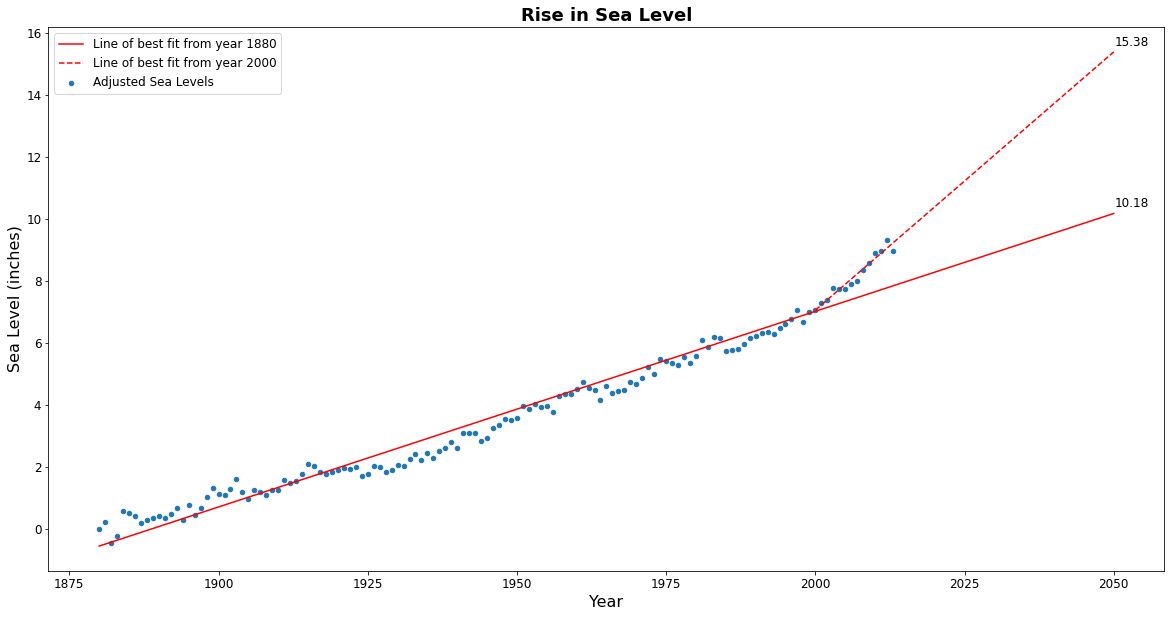

In [9]:
title_font = {"fontsize": 18, "fontweight": "bold"}
labels_font= {"fontsize": 16}

fig, axs = plt.subplots(figsize=(20,10))

df.plot.scatter(x="Year", 
                y="CSIRO Adjusted Sea Level",
                fontsize=12,
                ax=axs, 
                label="Adjusted Sea Levels")

axs.plot(years_to_2050, 
         levels_1880_2050, 
         "r-", 
         label="Line of best fit from year 1880")

axs.plot(years_to_2050[years_to_2050 >= 2000], 
         levels_2000_2050, 
         "r--", 
         label="Line of best fit from year 2000")

axs.set_title("Rise in Sea Level", fontdict=title_font)
axs.set_xlabel("Year", fontdict=labels_font)
axs.set_ylabel("Sea Level (inches)", fontdict=labels_font)
axs.legend(loc="upper left", fontsize=12)

plt.annotate(f"{levels_1880_2050.iloc[-1]:.2f}", xy=(2050+0.2, levels_1880_2050.iloc[-1]+0.2), size=12)
plt.annotate(f"{levels_2000_2050.iloc[-1]:.2f}", xy=(2050+0.2, levels_2000_2050.iloc[-1]+0.2), size=12)

plt.show()

##### Sea level prediction if the rate of rise continues as it has since the year 1880

In [10]:
f"Sea level: {levels_1880_2050.iloc[-1]:.2f} inches"

'Sea level: 10.18 inches'

##### See level prediction if the rate of rise continues as it has since the year 2000

In [11]:
f"Sea level: {levels_2000_2050.iloc[-1]:.2f} inches"

'Sea level: 15.38 inches'